# BOOK RECOMMENDATION SYSTEM

### Business Objective: Generate the features from the dataset and use them to recommend the books accordingly to the users.


### Data: -
#### •	Users
Users Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

#### •	Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

#### •	Ratings
 Ratings Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings ('ignore')

### Pre-processing 

### Book dataset pre-processing 

In [5]:
Book =pd.read_csv(r"D:\DA DS Course\DS_project\Books.csv")
Book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
#size of Book data
Book.shape

(271360, 8)

In [7]:
#checking Data Type
Book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [8]:
# Year-Of-Publication shows object data type

In [9]:
#cheking Null Values
Book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
#Total 6 null values
#Book-Author= 1 null value
#Publisher = 2 null value
#Image-URL-L = 3 null values

In [11]:
Book[Book.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [12]:
#Replace NaN with "Unknown" 
#Removing NaN Values of Book-Author and Publisher

In [13]:
Book['Publisher']=Book['Publisher'].fillna('Unknown')
Book['Book-Author']=Book['Book-Author'].fillna('Unknown')

In [14]:
Book[Book.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


<AxesSubplot:>

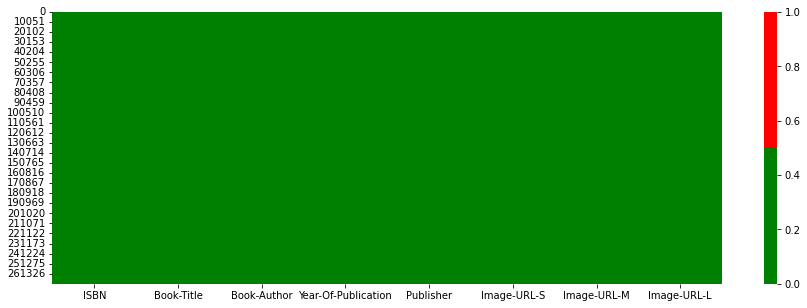

In [15]:
colours = ["Green",'Red'] 
plt.figure(figsize=(15,5))
sn.heatmap(Book.isnull(),
           cmap=sn.color_palette(colours))

In [16]:
#Checking Duplicates in data
Book[Book.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [17]:
#No Duplicates

In [18]:
#Checking Unique Values
Book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [19]:
#Year-Of-Publication columnn shows some publisher name

In [20]:
Book[Book["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [21]:
Book[Book["Year-Of-Publication"]=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [22]:
#Correcting the data of Year-of-publication ,Publisher, Book-Title, Book-Author column 
Book["Year-Of-Publication"]=Book["Year-Of-Publication"].replace("DK Publishing Inc",2000)
Book["Year-Of-Publication"]=Book["Year-Of-Publication"].replace("Gallimard",2003)

In [23]:
Book.at[209538 ,'Publisher'] = 'DK Publishing Inc'
Book.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
Book.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

Book.at[221678 ,'Publisher'] = 'DK Publishing Inc'
Book.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
Book.at[209538 ,'Book-Author'] = 'James Buckley'

Book.at[220731 ,'Publisher'] = 'Gallimard'
Book.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
Book.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le'


In [24]:
Book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [25]:
#Chenging Data type of Year-of-publication Column into int

In [26]:
Book["Year-Of-Publication"]=Book["Year-Of-Publication"].astype("int64")

In [27]:
#Data types of Book data columns
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [28]:
#Data types of Book data columns
Book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [29]:
#Checking Duplicates in data
Book[Book.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [30]:
#No Duplicate values

In [31]:
#Checking Outliers

In [32]:
Book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [33]:
len( Book[Book["Year-Of-Publication"]>=2022 ])

13

In [34]:
len( Book[Book["Year-Of-Publication"]==0 ])

4618

In [35]:
Book[Book["Year-Of-Publication"]==0 ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [36]:
Book["Year-Of-Publication"].mode()

0    2002
Name: Year-Of-Publication, dtype: int64

In [37]:
#Replacing value with mode
Book.loc[Book['Year-Of-Publication'] > 2022,'Year-Of-Publication'] = 2002
Book.loc[Book['Year-Of-Publication'] ==0 ,'Year-Of-Publication'] = 2002 

In [38]:
Book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376],
      dtype=int64)

In [39]:
#Droping Column 
Book.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1, inplace=True)

In [40]:
Book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [41]:
Top_Book_Publisher=pd.DataFrame(Book['Publisher'].value_counts())
Top_Book_Publisher.head(10)

,Publisher
Harlequin,7535
Silhouette,4220
Pocket,3905
Ballantine Books,3783
Bantam Books,3646
Scholastic,3160
Simon &amp; Schuster,2971
Penguin Books,2844
Berkley Publishing Group,2771
Warner Books,2727


Text(0.5, 1.0, 'No of books by an Publisher (Top 10)')

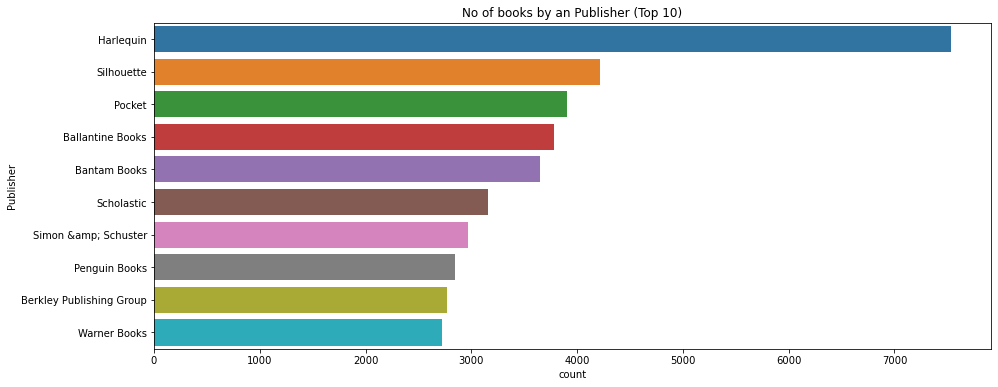

In [42]:
plt.figure(figsize=(15,6))
sn.countplot(y="Publisher", data=Book,order=Book['Publisher'].value_counts().index[0:10])
plt.title("No of books by an Publisher (Top 10)")

In [43]:
Top_Book_Author=pd.DataFrame(Book['Book-Author'].value_counts())
Top_Book_Author.head(10)

,Book-Author
Agatha Christie,632
William Shakespeare,567
Stephen King,524
Ann M. Martin,423
Carolyn Keene,373
Francine Pascal,372
Isaac Asimov,330
Nora Roberts,315
Barbara Cartland,307
Charles Dickens,302


Text(0.5, 1.0, 'No of books by an author(Top 10)')

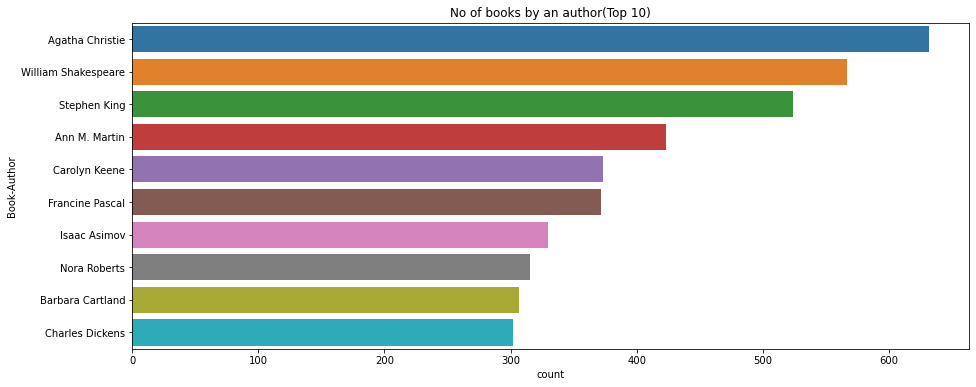

In [44]:
plt.figure(figsize=(15,6))
sn.countplot(y="Book-Author", data=Book,order=Book['Book-Author'].value_counts().index[0:10])
plt.title("No of books by an author(Top 10)")

In [45]:
Top_Book_Title=pd.DataFrame(Book['Book-Title'].value_counts())
Top_Book_Title.head(10)

,Book-Title
Selected Poems,27
Little Women,24
Wuthering Heights,21
The Secret Garden,20
Dracula,20
Adventures of Huckleberry Finn,20
Jane Eyre,19
The Night Before Christmas,18
Pride and Prejudice,18
Great Expectations,17


Text(0.5, 1.0, 'Most reading Books(Top 10)')

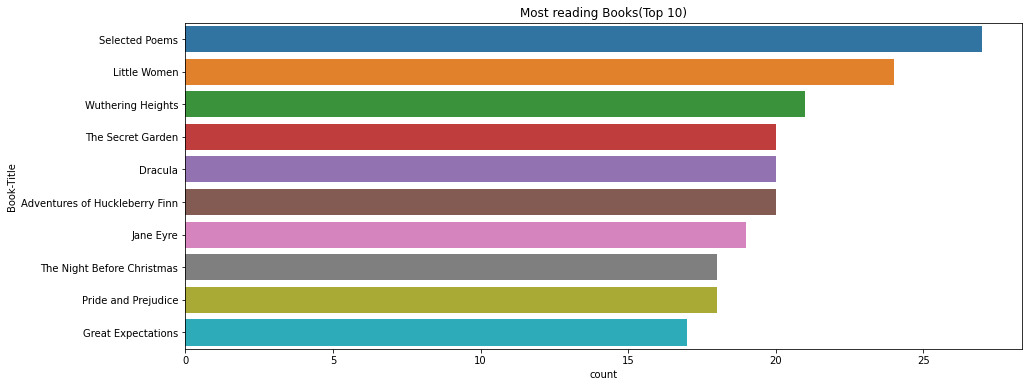

In [46]:
plt.figure(figsize=(15,6))
sn.countplot(y="Book-Title", data=Book,order=Book['Book-Title'].value_counts().index[0:10])
plt.title("Most reading Books(Top 10)")

In [47]:
Book_publication=pd.DataFrame(Book['Year-Of-Publication'].value_counts())
Book_publication.head(10)

,Year-Of-Publication
2002,22258
1999,17431
2001,17359
2000,17234
1998,15766
1997,14890
2003,14359
1996,14030
1995,13546
1994,11796


Text(0.5, 1.0, 'Books Published by year (Top 10)')

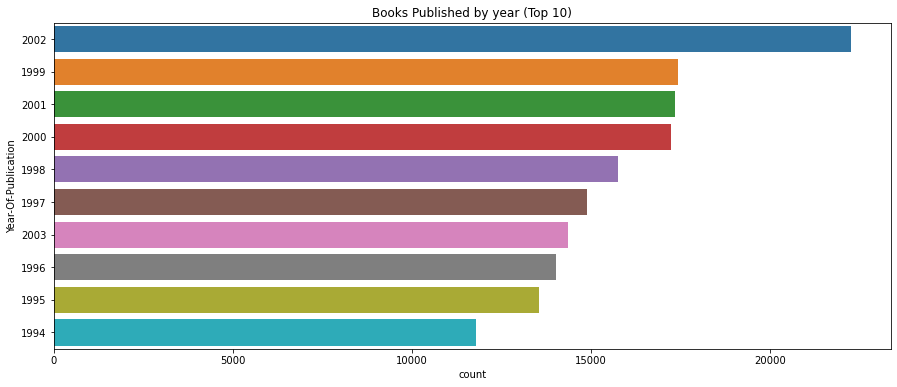

In [48]:
plt.figure(figsize=(15,6))
sn.countplot(y="Year-Of-Publication", data=Book,order=Book['Year-Of-Publication'].value_counts().index[0:10])
plt.title("Books Published by year (Top 10)")

In [49]:
Book=Book.rename({"Book-Title":"Book_Title","Book-Author":"Book_Author","Year-Of-Publication":"Year_Of_Publication"}, axis=1)
Book.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [50]:
Book.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Rating dataset Pre-processing

In [51]:
#Loading Data Set 

In [52]:
ratings= pd.read_csv(r"D:\DA DS Course\DS_project\Ratings.csv")
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [53]:
ratings.shape

(1149780, 3)

In [54]:
#Checking Datatype
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [55]:
#Checcking Null Values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [56]:
#Checking Duplicate Values
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [57]:
# No Null Values and no Duplicate values 

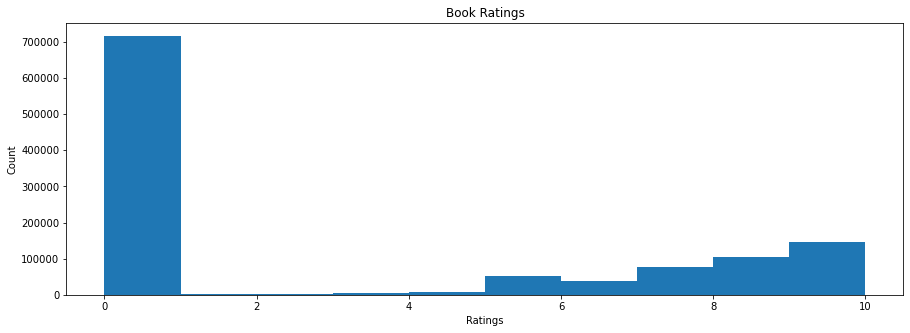

In [58]:
plt.figure(figsize=(8,6))
ratings["Book-Rating"].plot(kind="hist", figsize=(15,5))
plt.title('Book Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [59]:
Rating_Count=pd.DataFrame(ratings['Book-Rating'].value_counts())
Rating_Count

,Book-Rating
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996
2,2759


<AxesSubplot:xlabel='count', ylabel='ISBN'>

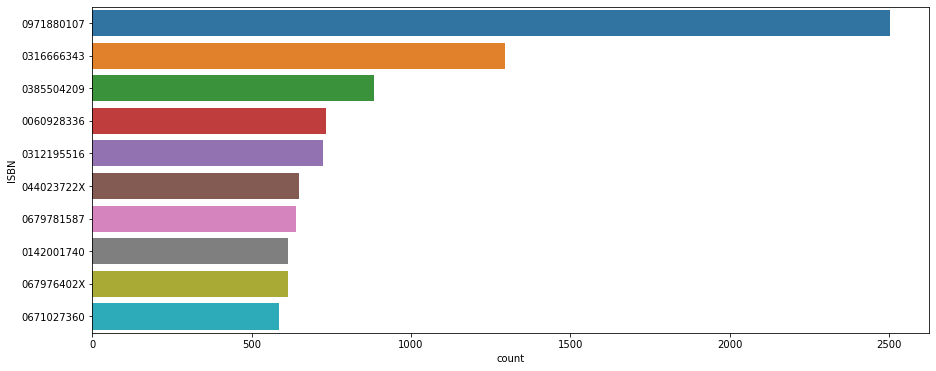

In [60]:
plt.figure(figsize=(15,6))
sn.countplot(y="ISBN", data=ratings,order=ratings['ISBN'].value_counts().index[0:10])

In [61]:
User_ID_Count=pd.DataFrame(ratings['User-ID'].value_counts())
User_ID_Count.head(10)

,User-ID
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
212898,4785
278418,4533
76352,3367
110973,3100
235105,3067


Text(0.5, 1.0, 'user who read maximum books(Top 10)')

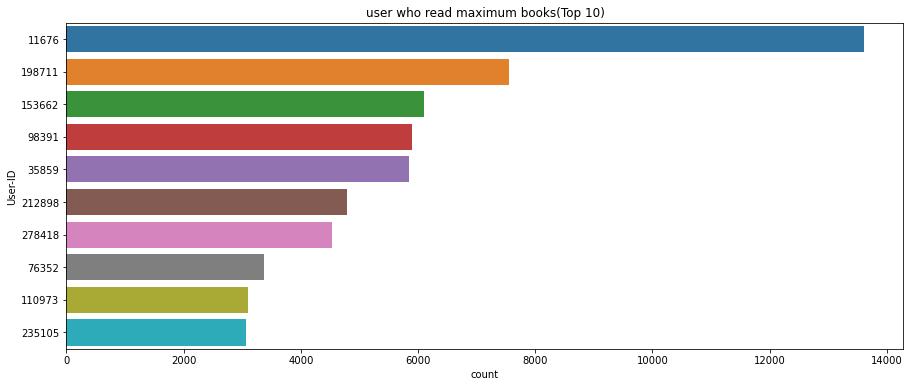

In [62]:
plt.figure(figsize=(15,6))
sn.countplot(y="User-ID", data=ratings,order=ratings['User-ID'].value_counts().index[0:10])
plt.title("user who read maximum books(Top 10)")

In [63]:
ratings=ratings.rename({"Book-Rating":"Book_Rating","User-ID":"User_ID"}, axis=1)
ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Users data Pre-processing 

In [64]:
#loading data set

In [65]:
users= pd.read_csv(r"D:\DA DS Course\DS_project\Users.csv")
users 

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [66]:
#Checcking Null Values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [67]:
# age column contains null values

In [68]:
len(users["User-ID"].unique())

278858

In [69]:
#% of null values
(110762/278858)*100

39.71985741847105

In [70]:
# Checking Outliers of age column
users["Age"].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [71]:
len(users["Age"].unique())

166

<AxesSubplot:>

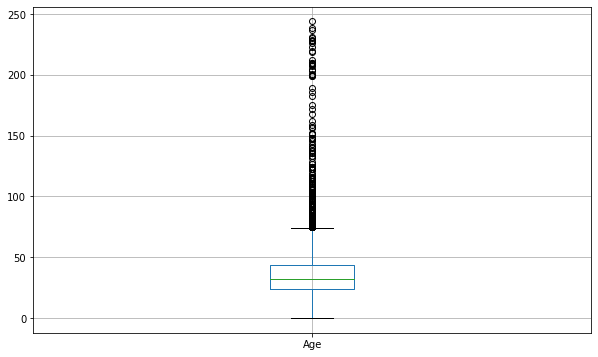

In [72]:
plt.figure(figsize=(10,6))
users.boxplot(column="Age")

<AxesSubplot:>

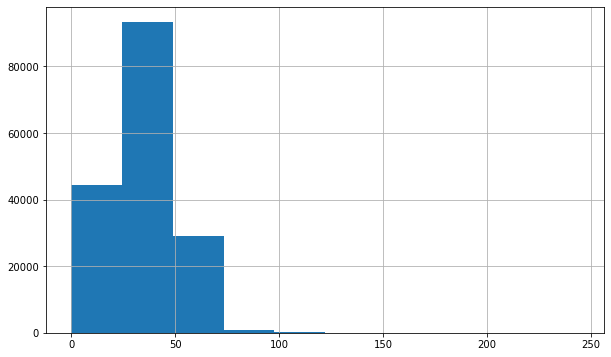

In [73]:
plt.figure(figsize=(10,6))
users["Age"].hist()

<AxesSubplot:xlabel='Age'>

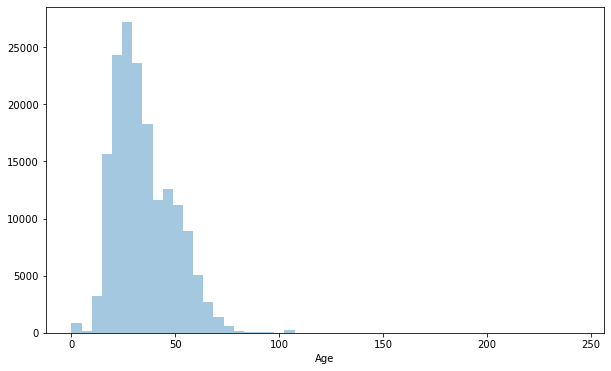

In [74]:
plt.figure(figsize=(10,6))
sn.distplot(a=users.Age, kde=False)

In [75]:
users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

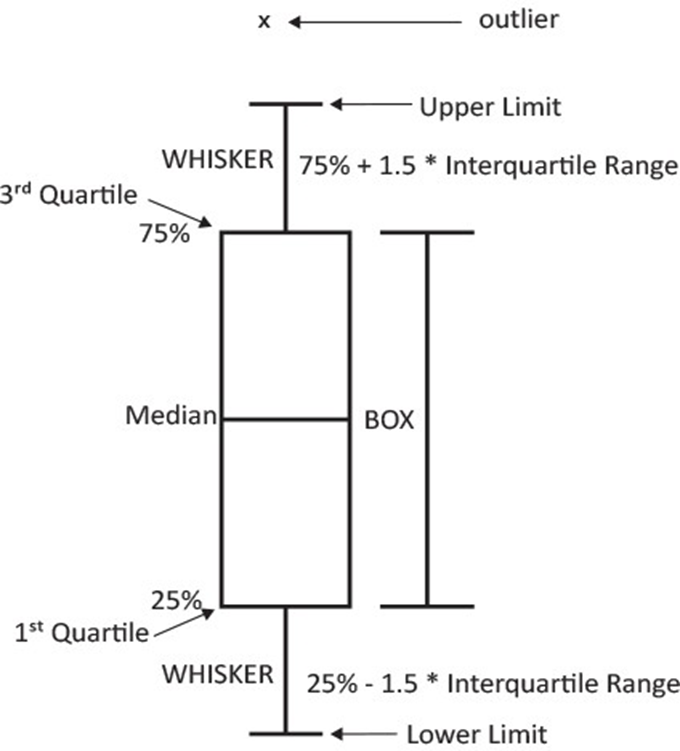

In [76]:
#Interquartile Range
print('Interquartile Range',44-24)

#Upper Limit 
print('Upper Limit',44+1.5*(44-24))

#Lower Limit 
print('Lower Limit',44-1.5*(44-24))

Interquartile Range 20
Upper Limit 74.0
Lower Limit 14.0


In [77]:
#Considering 
#Upper Limit = 100
#lower Limit = 10

In [78]:
users[users["Age"]>=100]

,User-ID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [79]:
len(users[users["Age"]>=100])

373

In [80]:
users[users["Age"]<=10]

,User-ID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
...,...,...,...
277404,277405,"bismarck, north dakota, usa",10.0
277908,277909,"phoenix, arizona, usa",2.0
278265,278266,"matale, sri lanka, sri lanka",7.0
278523,278524,"kansas city, ,",10.0


In [81]:
users[(users["Age"]>=10) & (users["Age"]<=100)]

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [82]:
users[(users["Age"]>=10) & (users["Age"]<=100)].mean()

User-ID    139399.065114
Age            34.777122
dtype: float64

In [83]:
users['Age']=users['Age'].fillna(35)

In [84]:
users.loc[(users["Age"]<=10) & (users["Age"]>=100)]= 35

In [85]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0
...,...,...,...
278853,278854,"portland, oregon, usa",35.0
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",35.0
278856,278857,"knoxville, tennessee, usa",35.0


In [86]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [87]:
# Checking duplicate values
users[users.duplicated()]

,User-ID,Location,Age


In [88]:
# No Duplicate values

In [89]:
# spliting the location column city state and country column 

In [90]:
users[["City","State","Country"]]=users['Location'].str.split(', ',n=2, expand=True)

In [91]:
users

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",35.0,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",35.0,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",35.0,knoxville,tennessee,usa


In [92]:
users.Country.value_counts()

usa                          139421
canada                        21601
united kingdom                18314
germany                       17024
spain                         13096
                              ...  
sao tome and principe"            1
-                                 1
hubei province, hong kong         1
portugal, portugal                1
united kingdom.                   1
Name: Country, Length: 1130, dtype: int64

In [93]:
users.State.value_counts()

california             19839
n/a                    12421
england                10656
ontario                 8717
texas                   8376
                       ...  
suisse                     1
nld                        1
oost_vlaanderen            1
sønderjylland              1
denbighshire county        1
Name: State, Length: 6663, dtype: int64

In [94]:
users.City.value_counts()

london       4105
barcelona    2664
toronto      2340
madrid       1933
sydney       1884
             ... 
delden          1
edmonon         1
nea makri       1
dunlop          1
stranraer       1
Name: City, Length: 33076, dtype: int64

In [95]:
users[users["Country"]=="n/a"]

,User-ID,Location,Age,City,State,Country
3095,3096,"n/a, n/a, n/a",35.0,n/a,n/a,n/a
10646,10647,"n/a, n/a, n/a",35.0,n/a,n/a,n/a
11675,11676,"n/a, n/a, n/a",35.0,n/a,n/a,n/a
42828,42829,"svendborg, n/a, n/a",35.0,svendborg,n/a,n/a
61592,61593,"n/a, n/a, n/a",35.0,n/a,n/a,n/a
64947,64948,"new york, n/a, n/a",35.0,new york,n/a,n/a
70062,70063,"n/a, n/a, n/a",35.0,n/a,n/a,n/a
86150,86151,"n/a, n/a, n/a",60.0,n/a,n/a,n/a
99705,99706,"heerlen, n/a, n/a",35.0,heerlen,n/a,n/a
119402,119403,"n/a, n/a, n/a",15.0,n/a,n/a,n/a


In [96]:
users[users["State"]=="n/a"]

,User-ID,Location,Age,City,State,Country
30,31,"shanghai, n/a, china",20.0,shanghai,n/a,china
36,37,"san sebastian, n/a, spain",23.0,san sebastian,n/a,spain
44,45,"berlin, n/a, germany",35.0,berlin,n/a,germany
64,65,"n/a, n/a, australia",35.0,n/a,n/a,australia
73,74,"amsterdam, n/a, netherlands",30.0,amsterdam,n/a,netherlands
...,...,...,...,...,...,...
278781,278782,"larnaca, n/a, cyprus",35.0,larnaca,n/a,cyprus
278787,278788,"zuerich, n/a, switzerland",35.0,zuerich,n/a,switzerland
278807,278808,"esplugas de llobregat, n/a, spain",43.0,esplugas de llobregat,n/a,spain
278852,278853,"stranraer, n/a, united kingdom",17.0,stranraer,n/a,united kingdom


In [97]:
users[users["City"]=="n/a"]

,User-ID,Location,Age,City,State,Country
64,65,"n/a, n/a, australia",35.0,n/a,n/a,australia
1372,1373,"n/a, n/a, lesotho",35.0,n/a,n/a,lesotho
2064,2065,"n/a, n/a, singapore",16.0,n/a,n/a,singapore
2196,2197,"n/a, travelling, canada",26.0,n/a,travelling,canada
2759,2760,"n/a, aargau, switzerland",23.0,n/a,aargau,switzerland
...,...,...,...,...,...,...
277127,277128,"n/a, st andrew`s, guernsey",19.0,n/a,st andrew`s,guernsey
277419,277420,"n/a, n/a, united kingdom",56.0,n/a,n/a,united kingdom
277706,277707,"n/a, n/a, united kingdom",35.0,n/a,n/a,united kingdom
277849,277850,"n/a, bkk, bkk",35.0,n/a,bkk,bkk


In [98]:
#Replace n/a with other
users["Country"]=users["Country"].replace("n/a","Other")
users["State"]=users["Country"].replace("n/a","Other")
users["City"]=users["City"].replace("n/a","Other")
users

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,usa,usa
1,2,"stockton, california, usa",18.0,stockton,usa,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,russia,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,united kingdom,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",35.0,portland,usa,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,united kingdom,united kingdom
278855,278856,"brampton, ontario, canada",35.0,brampton,canada,canada
278856,278857,"knoxville, tennessee, usa",35.0,knoxville,usa,usa


In [99]:
users[users["City"]=="n/a"]

,User-ID,Location,Age,City,State,Country


In [100]:
users[users["Country"]=="n/a"]

,User-ID,Location,Age,City,State,Country


In [101]:
users[users["State"]=="n/a"]

,User-ID,Location,Age,City,State,Country


In [102]:
users[users["Country"]=="usa"]

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,usa,usa
1,2,"stockton, california, usa",18.0,stockton,usa,usa
5,6,"santa monica, california, usa",61.0,santa monica,usa,usa
6,7,"washington, dc, usa",35.0,washington,usa,usa
8,9,"germantown, tennessee, usa",35.0,germantown,usa,usa
...,...,...,...,...,...,...
278843,278844,"st. paul, minnesota, usa",28.0,st. paul,usa,usa
278846,278847,"brooklyn, new york, usa",35.0,brooklyn,usa,usa
278850,278851,"dallas, texas, usa",33.0,dallas,usa,usa
278853,278854,"portland, oregon, usa",35.0,portland,usa,usa


In [103]:
users[users["City"]=="usa"]

,User-ID,Location,Age,City,State,Country
17589,17590,"usa, california, usa",16.0,usa,usa,usa
22165,22166,"usa, oregon, usa",35.0,usa,usa,usa
30387,30388,"usa, colorado, usa",30.0,usa,usa,usa
52023,52024,"usa, arizona, usa",35.0,usa,usa,usa
75206,75207,"usa, alabama, usa",27.0,usa,usa,usa
113874,113875,"usa, california, usa",36.0,usa,usa,usa
189070,189071,"usa, washington, usa",35.0,usa,usa,usa
218352,218353,"usa, ohio, usa",35.0,usa,usa,usa
234434,234435,"usa, usa, usa",35.0,usa,usa,usa


In [104]:
users[users["State"]=="usa"]

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,usa,usa
1,2,"stockton, california, usa",18.0,stockton,usa,usa
5,6,"santa monica, california, usa",61.0,santa monica,usa,usa
6,7,"washington, dc, usa",35.0,washington,usa,usa
8,9,"germantown, tennessee, usa",35.0,germantown,usa,usa
...,...,...,...,...,...,...
278843,278844,"st. paul, minnesota, usa",28.0,st. paul,usa,usa
278846,278847,"brooklyn, new york, usa",35.0,brooklyn,usa,usa
278850,278851,"dallas, texas, usa",33.0,dallas,usa,usa
278853,278854,"portland, oregon, usa",35.0,portland,usa,usa


In [105]:
# Only keeping Country column because in city and state column contains same values like usa, swazliand

In [106]:
users=users.drop(columns=['Location','City','State'], axis=1)
users

,User-ID,Age,Country
0,1,35.0,usa
1,2,18.0,usa
2,3,35.0,russia
3,4,17.0,portugal
4,5,35.0,united kingdom
...,...,...,...
278853,278854,35.0,usa
278854,278855,50.0,united kingdom
278855,278856,35.0,canada
278856,278857,35.0,usa


In [107]:
# Rename the coulmn 
users=users.rename({"User-ID":"User_ID"},axis=1)
users

,User_ID,Age,Country
0,1,35.0,usa
1,2,18.0,usa
2,3,35.0,russia
3,4,17.0,portugal
4,5,35.0,united kingdom
...,...,...,...
278853,278854,35.0,usa
278854,278855,50.0,united kingdom
278855,278856,35.0,canada
278856,278857,35.0,usa


In [108]:
age_count=pd.DataFrame(users['Age'].value_counts())
age_count

,Age
35.0,114956
24.0,5687
25.0,5618
26.0,5547
23.0,5456
...,...
168.0,1
132.0,1
159.0,1
186.0,1


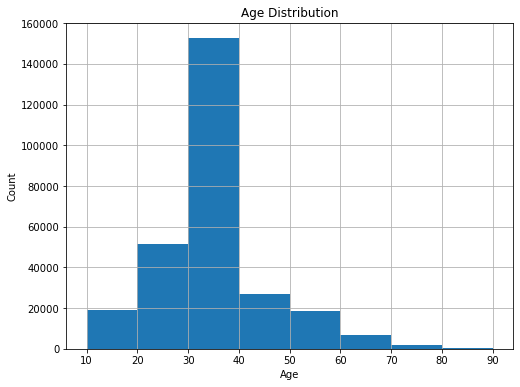

In [109]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [110]:
Country_Count=pd.DataFrame(users['Country'].value_counts())
Country_Count.head(10)

,Country
usa,139421
canada,21601
united kingdom,18314
germany,17024
spain,13096
australia,11730
italy,11244
france,3440
portugal,3312
new zealand,3072


Text(0.5, 1.0, 'No of readers from each country (Top 10)')

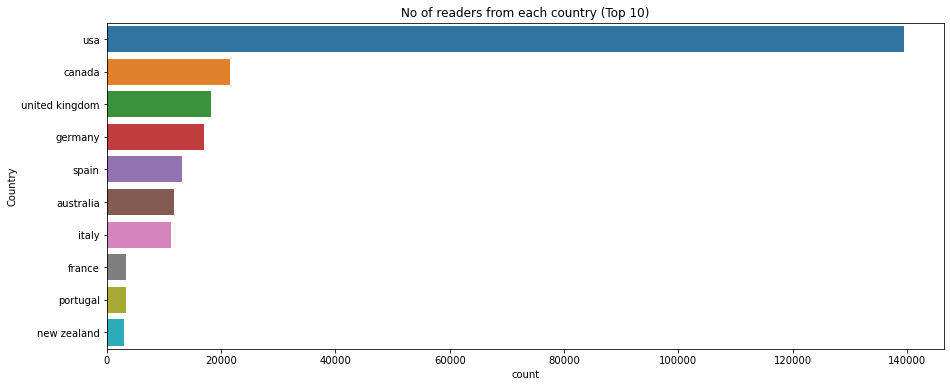

In [111]:
plt.figure(figsize=(15,6))
sn.countplot(y="Country", data=users,order=users['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

### Merging Data Set 

### Merging Book , Users and Rating Tables in one data frame

Using Inner join because it returns a dataframe with only those rows that have common characteristics.

In [112]:
data1=pd.merge(ratings,Book,on="ISBN", how="inner" )

In [113]:
data=pd.merge(data1,users,on="User_ID", how="inner" )
data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,35.0,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,usa
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35.0,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,usa


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book_Rating          1031136 non-null  int64  
 3   Book_Title           1031136 non-null  object 
 4   Book_Author          1031136 non-null  object 
 5   Year_Of_Publication  1031136 non-null  int64  
 6   Publisher            1031136 non-null  object 
 7   Age                  1031136 non-null  float64
 8   Country              1006941 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 78.7+ MB


In [115]:
data[data.duplicated()]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country


In [116]:
# Categorizing age column
age=data["Age"].values

In [117]:
import numpy as np
data["Age_category"]=pd.cut(age,bins=[10,25,40,75,100],labels=["Children","Youth","Adult","senior"])

In [118]:
data.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,35.0,usa,Youth
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,usa,Children
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,usa,Children
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,usa,Children
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,usa,Children


Text(0.5, 1.0, 'Most Rated Books (Top 10)')

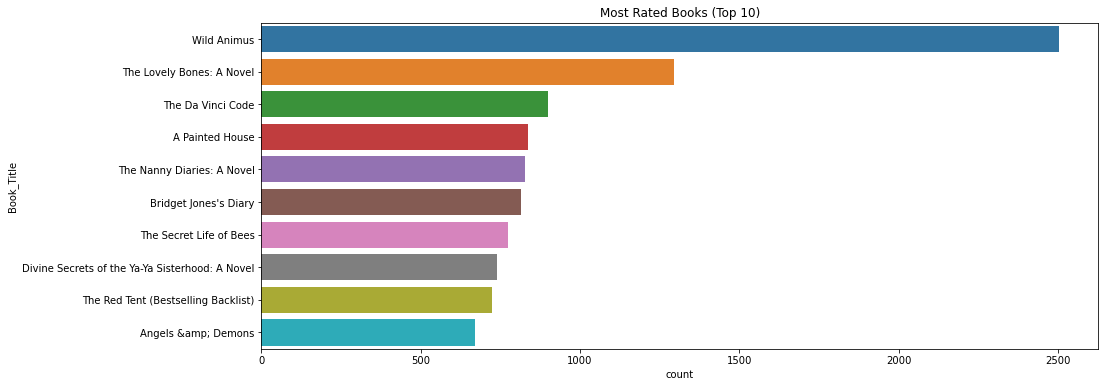

In [119]:
plt.figure(figsize=(15,6))
sn.countplot(y="Book_Title", data=data,order=data['Book_Title'].value_counts().index[0:10])
plt.title("Most Rated Books (Top 10)")

Text(0.5, 1.0, 'No of books by an author (Top 10)')

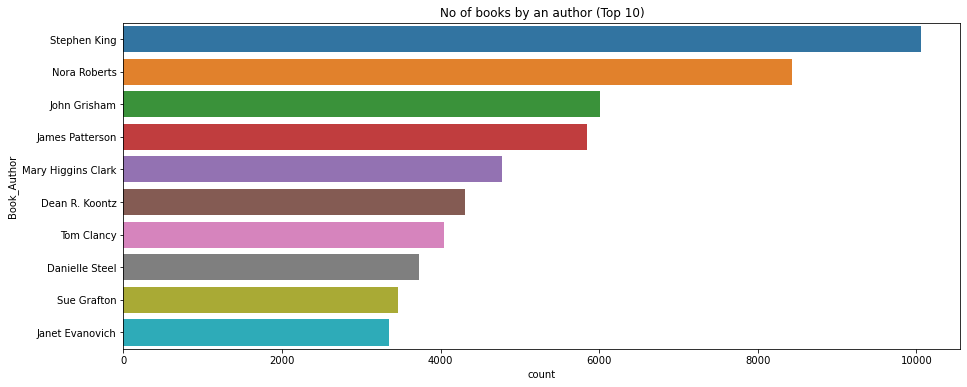

In [120]:
plt.figure(figsize=(15,6))
sn.countplot(y="Book_Author", data=data,order=data['Book_Author'].value_counts().index[0:10])
plt.title("No of books by an author (Top 10)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 10)')

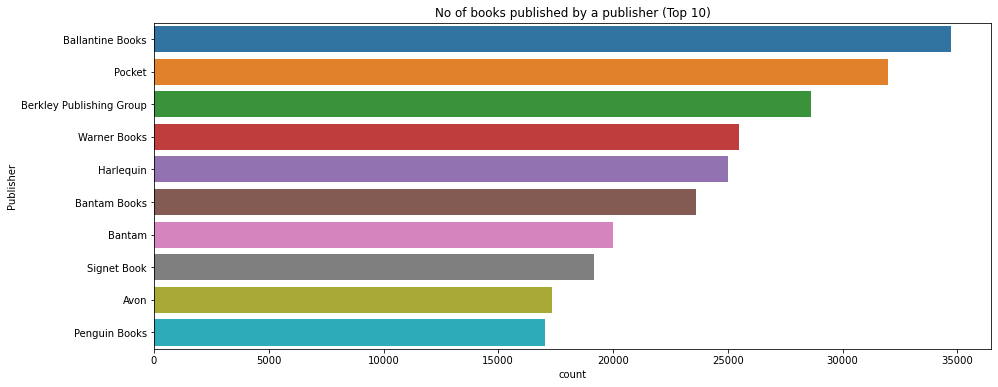

In [121]:
plt.figure(figsize=(15,6))
sn.countplot(y="Publisher", data=data,order=data['Publisher'].value_counts().index[0:10])
plt.title("No of books published by a publisher (Top 10)")

Text(0.5, 1.0, 'No of readers from each country (Top 10)')

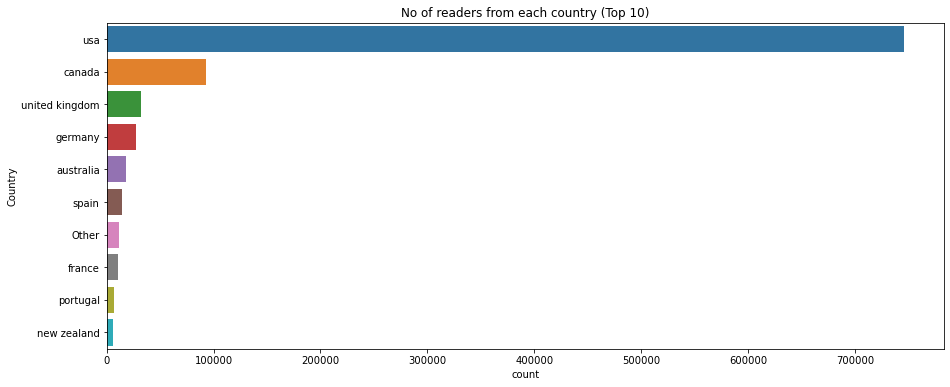

In [122]:
plt.figure(figsize=(15,6))
sn.countplot(y="Country", data=data,order=data['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

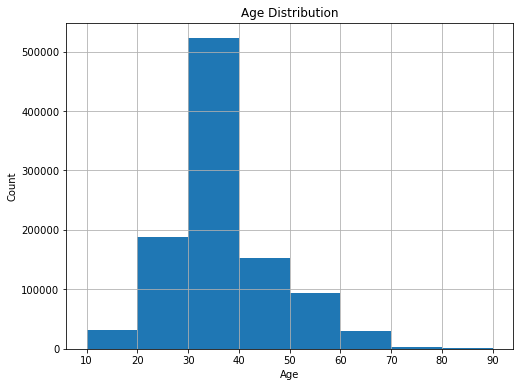

In [123]:
plt.figure(figsize=(8,6))
data.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Book_Rating', ylabel='count'>

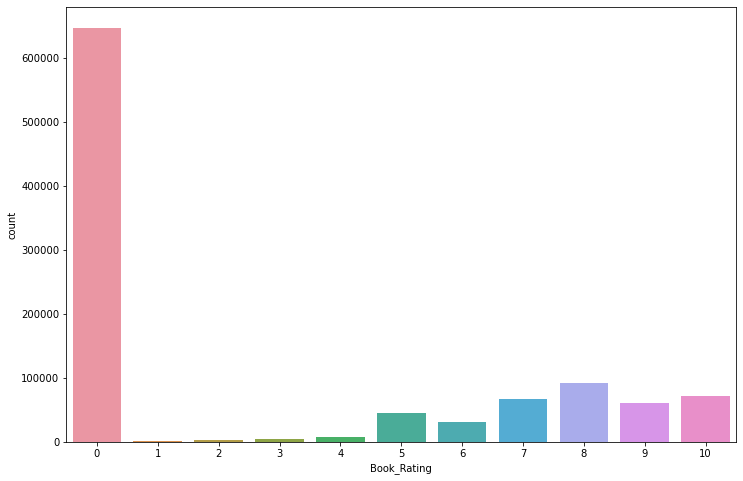

In [124]:
plt.figure(figsize=(12, 8))
sn.countplot(data=data , x='Book_Rating')

### Dividing the dataset into Implicit and Explicit dataset

In [125]:
#implicit and explict ratings datasets
data_explicit = data[data['Book_Rating'] != 0]
data_implicit = data[data['Book_Rating'] == 0]

<AxesSubplot:xlabel='Book_Rating', ylabel='count'>

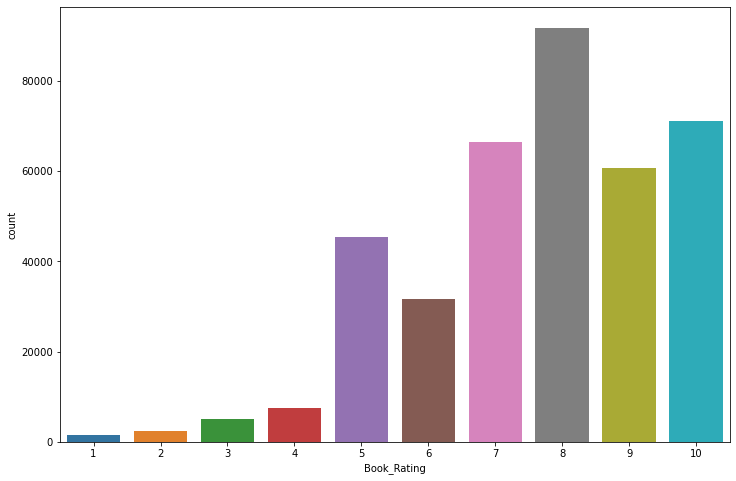

In [126]:
plt.figure(figsize=(12, 8))
sn.countplot(data=data_explicit , x='Book_Rating')

In [127]:
# Top 10 books which are rated by most number of users
data_explicit.groupby('ISBN')['Book_Rating'].count().sort_values(ascending=False).head(10)

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
0452282152    278
Name: Book_Rating, dtype: int64

In [128]:
data_explicit.groupby('Publisher')['Book_Rating'].mean().sort_values(ascending=False).head(10)

Publisher
 Editions P. Terrail    10.0
Imagenes Press          10.0
III Pub                 10.0
IMAGE                   10.0
IRD Orstom              10.0
ISIS Audio              10.0
Ignatius PR             10.0
Ignatius Pr             10.0
Il Castoro              10.0
ImaJinn Books           10.0
Name: Book_Rating, dtype: float64

In [129]:
data_explicit.groupby('Book_Author')['Book_Rating'].mean().sort_values(ascending=False).head(10)

Book_Author
 D. Chiel            10.0
Carole Chester       10.0
Larry Towell         10.0
Larry Sloman         10.0
Larry Sabato         10.0
Larry Nyhoff         10.0
Carole Ann Lee       10.0
Larry Lachman        10.0
Larry Keenan         10.0
Larry K. Brendtro    10.0
Name: Book_Rating, dtype: float64

Text(0.5, 1.0, 'Top 10 Book authors with respect to ratings')

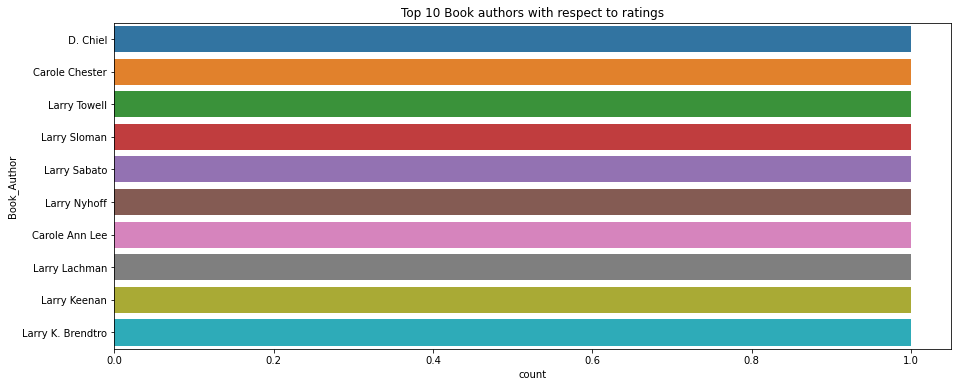

In [130]:
plt.figure(figsize=(15,6))
sn.countplot(y="Book_Author", data=data_explicit,order=data_explicit.groupby('Book_Author')['Book_Rating'].mean()
             .sort_values(ascending=False).index[0:10])
plt.title("Top 10 Book authors with respect to ratings")

In [131]:
data_explicit.groupby('Country')['Book_Rating'].mean().sort_values(ascending=False).head(10)

Country
ile de france, france    10.0
la suisse                10.0
united staes             10.0
unknown                  10.0
new hampshire, usa       10.0
usa & canada             10.0
anystate, usa, usa       10.0
turkey"                  10.0
la chine éternelle!      10.0
nevada, usa              10.0
Name: Book_Rating, dtype: float64

Text(0.5, 1.0, 'Most Rating given by countries (Top 10 Countries)')

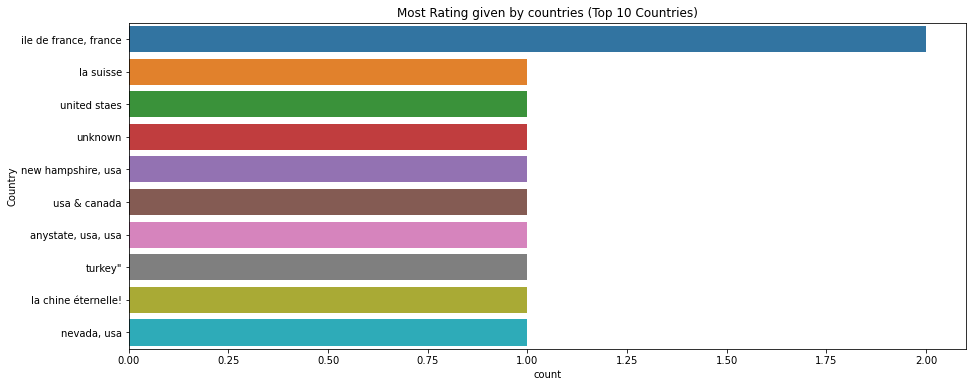

In [132]:
plt.figure(figsize=(15,6))
sn.countplot(y="Country", data=data_explicit,order=data_explicit.groupby('Country')['Book_Rating'].mean()
             .sort_values(ascending=False).index[0:10])
plt.title("Most Rating given by countries (Top 10 Countries)")

In [133]:
data_explicit.groupby('Age_category')['Book_Rating'].mean().sort_values(ascending=False)

Age_category
Adult       7.831492
Children    7.715985
Youth       7.532664
senior      7.347188
Name: Book_Rating, dtype: float64

Text(0.5, 1.0, 'Ratings given by each age category')

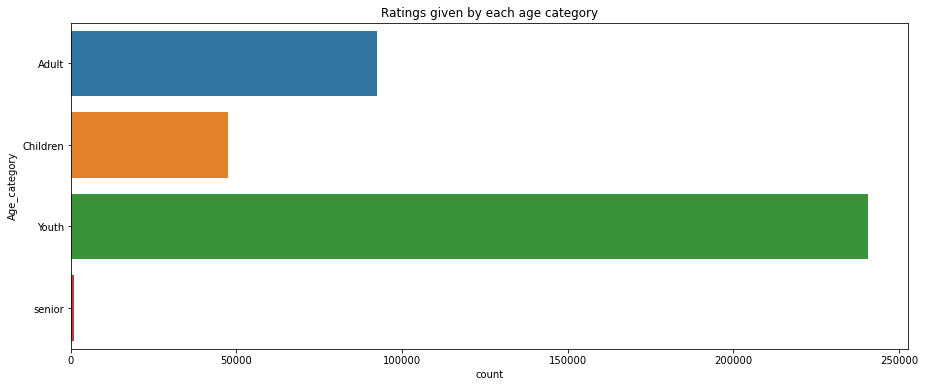

In [134]:
plt.figure(figsize=(15,6))
sn.countplot(y="Age_category", data=data_explicit,order=data_explicit.groupby('Age_category')['Book_Rating'].mean()
             .sort_values(ascending=False).index[0:4])
plt.title('Ratings given by each age category')

## Model Building

### 1. Popularity Based Method 

In [135]:
from scipy.spatial.distance import cosine,correlation
from sklearn.metrics import pairwise_distances

In [136]:
ratings

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [137]:
rating_explicit = ratings[ratings['Book_Rating'] != 0]

In [138]:
rating_explicit["Avg_Rating"]=rating_explicit.groupby('ISBN')["Book_Rating"].transform('mean')
rating_explicit["No_Of_users_Rated"]=rating_explicit.groupby('ISBN')["Book_Rating"].transform('count')
rating_explicit= rating_explicit.sort_values('No_Of_users_Rated',ascending=False)
rating_explicit

,User_ID,ISBN,Book_Rating,Avg_Rating,No_Of_users_Rated
122939,28269,0316666343,8,8.18529,707
786352,190123,0316666343,10,8.18529,707
744822,180042,0316666343,8,8.18529,707
942614,228477,0316666343,9,8.18529,707
281655,66989,0316666343,8,8.18529,707
...,...,...,...,...,...
559109,134837,9810400470,7,7.00000,1
559110,134837,9812047883,7,7.00000,1
559112,134837,9813002689,9,9.00000,1
559119,134837,9839995006,5,5.00000,1


In [139]:
# Taking records with average rating atleast 8 
top = rating_explicit[rating_explicit['Avg_Rating']>=8] 
# Taking records with number of revied user more than 200
top_most = top[top['No_Of_users_Rated']>=200]      

In [140]:
#top_most.sort_values(by='No_Of_users_Rated',ascending=False)

In [141]:
#top_most.ISBN.unique()

In [142]:
Top_Book = top_most.drop_duplicates("ISBN",keep="first")
Top_Book

,User_ID,ISBN,Book_Rating,Avg_Rating,No_Of_users_Rated
122939,28269,0316666343,8,8.185290,707
508719,123827,0385504209,8,8.435318,487
673771,163876,0312195516,6,8.182768,383
597006,144038,0679781587,9,8.408408,333
699667,170513,059035342X,10,8.939297,313
863353,208751,0142001740,6,8.452769,307
869415,210406,0446672211,7,8.142373,295
164337,36326,0671027360,6,8.100372,269
433111,103190,0786868716,3,8.016529,242
1062586,253871,0743418174,10,8.046610,236


In [143]:
Top_Book.sort_values(by=['Avg_Rating'],ascending=False)

,User_ID,ISBN,Book_Rating,Avg_Rating,No_Of_users_Rated
1106984,265562,043935806X,9,9.033981,206
941333,227836,0446310786,10,8.943925,214
699667,170513,059035342X,10,8.939297,313
487354,115940,0385484518,9,8.615000,200
863353,208751,0142001740,6,8.452769,307
508719,123827,0385504209,8,8.435318,487
597006,144038,0679781587,9,8.408408,333
122939,28269,0316666343,8,8.185290,707
673771,163876,0312195516,6,8.182768,383
621727,150587,0060930535,8,8.178899,218


In [144]:
Top_recomm = pd.merge(Top_Book,Book,how='inner')
Top_recomm

,User_ID,ISBN,Book_Rating,Avg_Rating,No_Of_users_Rated,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,28269,0316666343,8,8.185290,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,123827,0385504209,8,8.435318,487,The Da Vinci Code,Dan Brown,2003,Doubleday
2,163876,0312195516,6,8.182768,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
3,170513,059035342X,10,8.939297,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
4,208751,0142001740,6,8.452769,307,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
5,210406,0446672211,7,8.142373,295,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
6,36326,0671027360,6,8.100372,269,Angels &amp; Demons,Dan Brown,2001,Pocket Star
7,103190,0786868716,3,8.016529,242,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion
8,253871,0743418174,10,8.046610,236,Good in Bed,Jennifer Weiner,2002,Washington Square Press
9,117852,0156027321,7,8.030973,226,Life of Pi,Yann Martel,2003,Harvest Books


### Collabroative Filtering 

In [145]:
 # Selecting books which is rated by atleast 50 readers
df = rating_explicit[rating_explicit['No_Of_users_Rated'] >= 50]
df

,User_ID,ISBN,Book_Rating,Avg_Rating,No_Of_users_Rated
122939,28269,0316666343,8,8.18529,707
786352,190123,0316666343,10,8.18529,707
744822,180042,0316666343,8,8.18529,707
942614,228477,0316666343,9,8.18529,707
281655,66989,0316666343,8,8.18529,707
...,...,...,...,...,...
771702,186821,0452282195,5,7.36000,50
23280,5331,0091867770,10,7.86000,50
109286,25253,0670865796,9,7.34000,50
1131874,271448,0684853515,8,7.74000,50


In [146]:
Books_user_df = df.pivot_table(index='ISBN',columns='User_ID',values='Book_Rating')
Books_user_df

User_ID,9,16,26,42,51,91,97,99,114,125,...,278755,278773,278798,278800,278828,278832,278836,278843,278844,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060096195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006016848X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060173289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
0060175400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573229326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573229571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1592400876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
Books_user_df.fillna(0,inplace=True)
Books_user_df.head()

User_ID,9,16,26,42,51,91,97,99,114,125,...,278755,278773,278798,278800,278828,278832,278836,278843,278844,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
0060175400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
item_sim = 1- pairwise_distances(Books_user_df.values,metric='cosine')
item_sim_df = pd.DataFrame(item_sim)
item_sim_df

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
0,1.000000,0.000000,0.014222,0.000000,0.024904,0.013124,0.011569,0.025633,0.014141,0.028294,...,0.023633,0.013015,0.029431,0.030372,0.039190,0.038208,0.026314,0.026203,0.011120,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.015929,0.000000,0.000000,0.022010,0.000000,0.012913,...,0.000000,0.040698,0.000000,0.011182,0.000000,0.000000,0.000000,0.027342,0.000000,0.000000
2,0.014222,0.000000,1.000000,0.000000,0.022034,0.025546,0.035030,0.022902,0.042816,0.000000,...,0.034368,0.025333,0.000000,0.020623,0.014670,0.016614,0.046645,0.023341,0.021644,0.033698
3,0.000000,0.000000,0.000000,1.000000,0.055618,0.059895,0.000000,0.023828,0.027785,0.000000,...,0.018991,0.000000,0.000000,0.014403,0.000000,0.008288,0.021900,0.000000,0.000000,0.000000
4,0.024904,0.015929,0.022034,0.055618,1.000000,0.095362,0.017924,0.036457,0.016753,0.027438,...,0.018938,0.040327,0.000000,0.016415,0.011676,0.013224,0.018345,0.018578,0.017227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.038208,0.000000,0.016614,0.008288,0.013224,0.015332,0.013515,0.016690,0.017769,0.000000,...,0.014280,0.015204,0.085370,0.029705,0.134831,1.000000,0.109393,0.030018,0.012990,0.000000
533,0.026314,0.000000,0.046645,0.021900,0.018345,0.017724,0.015624,0.031779,0.008987,0.002833,...,0.031601,0.017576,0.021901,0.014308,0.062813,0.109393,1.000000,0.028532,0.015017,0.000000
534,0.026203,0.027342,0.023341,0.000000,0.018578,0.021539,0.032277,0.046281,0.038224,0.000000,...,0.020061,0.021359,0.020445,0.049073,0.012368,0.030018,0.028532,1.000000,0.018249,0.000000
535,0.011120,0.000000,0.021644,0.000000,0.017227,0.019973,0.017606,0.000000,0.010127,0.000000,...,0.018603,0.019807,0.000000,0.016124,0.011469,0.012990,0.015017,0.018249,1.000000,0.000000


In [149]:
item_sim_df.columns = df['ISBN'].unique()
item_sim_df.index = df['ISBN'].unique()
item_sim_df

,0316666343,0971880107,0385504209,0312195516,0679781587,0060928336,059035342X,0142001740,0446672211,044023722X,...,0670865796,0446516538,0375760911,0743224574,076790592X,0385503954,0380727501,0091867770,0446675059,051513628X
0316666343,1.000000,0.000000,0.014222,0.000000,0.024904,0.013124,0.011569,0.025633,0.014141,0.028294,...,0.023633,0.013015,0.029431,0.030372,0.039190,0.038208,0.026314,0.026203,0.011120,0.000000
0971880107,0.000000,1.000000,0.000000,0.000000,0.015929,0.000000,0.000000,0.022010,0.000000,0.012913,...,0.000000,0.040698,0.000000,0.011182,0.000000,0.000000,0.000000,0.027342,0.000000,0.000000
0385504209,0.014222,0.000000,1.000000,0.000000,0.022034,0.025546,0.035030,0.022902,0.042816,0.000000,...,0.034368,0.025333,0.000000,0.020623,0.014670,0.016614,0.046645,0.023341,0.021644,0.033698
0312195516,0.000000,0.000000,0.000000,1.000000,0.055618,0.059895,0.000000,0.023828,0.027785,0.000000,...,0.018991,0.000000,0.000000,0.014403,0.000000,0.008288,0.021900,0.000000,0.000000,0.000000
0679781587,0.024904,0.015929,0.022034,0.055618,1.000000,0.095362,0.017924,0.036457,0.016753,0.027438,...,0.018938,0.040327,0.000000,0.016415,0.011676,0.013224,0.018345,0.018578,0.017227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0385503954,0.038208,0.000000,0.016614,0.008288,0.013224,0.015332,0.013515,0.016690,0.017769,0.000000,...,0.014280,0.015204,0.085370,0.029705,0.134831,1.000000,0.109393,0.030018,0.012990,0.000000
0380727501,0.026314,0.000000,0.046645,0.021900,0.018345,0.017724,0.015624,0.031779,0.008987,0.002833,...,0.031601,0.017576,0.021901,0.014308,0.062813,0.109393,1.000000,0.028532,0.015017,0.000000
0091867770,0.026203,0.027342,0.023341,0.000000,0.018578,0.021539,0.032277,0.046281,0.038224,0.000000,...,0.020061,0.021359,0.020445,0.049073,0.012368,0.030018,0.028532,1.000000,0.018249,0.000000
0446675059,0.011120,0.000000,0.021644,0.000000,0.017227,0.019973,0.017606,0.000000,0.010127,0.000000,...,0.018603,0.019807,0.000000,0.016124,0.011469,0.012990,0.015017,0.018249,1.000000,0.000000


In [150]:
# Filling diagonals with zero
np.fill_diagonal(item_sim,0)
item_sim_df.iloc[0:5]

,0316666343,0971880107,0385504209,0312195516,0679781587,0060928336,059035342X,0142001740,0446672211,044023722X,...,0670865796,0446516538,0375760911,0743224574,076790592X,0385503954,0380727501,0091867770,0446675059,051513628X
0316666343,0.000000,0.000000,0.014222,0.000000,0.024904,0.013124,0.011569,0.025633,0.014141,0.028294,...,0.023633,0.013015,0.029431,0.030372,0.039190,0.038208,0.026314,0.026203,0.011120,0.000000
0971880107,0.000000,0.000000,0.000000,0.000000,0.015929,0.000000,0.000000,0.022010,0.000000,0.012913,...,0.000000,0.040698,0.000000,0.011182,0.000000,0.000000,0.000000,0.027342,0.000000,0.000000
0385504209,0.014222,0.000000,0.000000,0.000000,0.022034,0.025546,0.035030,0.022902,0.042816,0.000000,...,0.034368,0.025333,0.000000,0.020623,0.014670,0.016614,0.046645,0.023341,0.021644,0.033698
0312195516,0.000000,0.000000,0.000000,0.000000,0.055618,0.059895,0.000000,0.023828,0.027785,0.000000,...,0.018991,0.000000,0.000000,0.014403,0.000000,0.008288,0.021900,0.000000,0.000000,0.000000
0679781587,0.024904,0.015929,0.022034,0.055618,0.000000,0.095362,0.017924,0.036457,0.016753,0.027438,...,0.018938,0.040327,0.000000,0.016415,0.011676,0.013224,0.018345,0.018578,0.017227,0.000000


In [151]:
item_sim_df.idxmax(axis=1)[0:5]

0316666343    0743412028
0971880107    0446670111
0385504209    1844262553
0312195516    0670894605
0679781587    0060928336
dtype: object

In [152]:
ISBN_DF=item_sim_df.idxmax(axis=1)
ISBN_DF

0316666343    0743412028
0971880107    0446670111
0385504209    1844262553
0312195516    0670894605
0679781587    0060928336
                 ...    
0385503954    076790592X
0380727501    0385335482
0091867770    0552137030
0446675059    1559029838
051513628X    0385335830
Length: 537, dtype: object

In [153]:
ISBN_DF['0060173289']

'0156027321'

In [195]:
def ISBNRecommendation(ISBN_No):
    recommendation=ISBN_DF[ISBN_No]
    print("Recommendaed_Book: ",data_explicit[data_explicit['ISBN']==recommendation]['Book_Title'].values[0])

In [196]:
ISBN_No = input("Enter a ISBN No: ")
ISBNRecommendation(ISBN_No)

Enter a ISBN No: 0679781587
Recommendaed_Book:  Divine Secrets of the Ya-Ya Sisterhood: A Novel


In [197]:
data_explicit[data_explicit['ISBN']=="0060173289"]['Book_Title'].values[0]

'Divine Secrets of the Ya-Ya Sisterhood : A Novel'

In [198]:
data_explicit[data_explicit['ISBN']=="0425167313"]['Book_Title'].values[0]

'Here on Earth'

In [199]:
data_explicit[data_explicit['ISBN']=="0553582755"]['Book_Title'].values[0]

'One Door Away from Heaven'

In [200]:
ISBN_No = input("Enter a ISBN No: ")
ISBNRecommendation(ISBN_No)

Enter a ISBN No: 0385504209
Recommendaed_Book:  Free


In [201]:
data_explicit[data_explicit['ISBN']=="0446605484"]['Book_Title'].values[0]

'Roses Are Red (Alex Cross Novels)'

In [202]:
data_explicit[data_explicit['ISBN']=="0446605484"]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,34.0,usa,Youth
13498,208406,0446605484,9,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,30.0,usa,Youth
23427,7158,0446605484,8,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,30.0,usa,Youth
64157,245568,0446605484,8,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,35.0,usa,Youth
64394,258534,0446605484,8,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,32.0,usa,Youth
...,...,...,...,...,...,...,...,...,...,...
717827,257809,0446605484,5,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,51.0,usa,Adult
717843,259837,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,36.0,usa,Youth
717845,259976,0446605484,7,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,15.0,usa,Children
717875,261317,0446605484,8,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,43.0,usa,Adult


## User Based Collabrative filtering

In [160]:
user_df= data_explicit
user_df=user_df.drop(columns=["Year_Of_Publication","Publisher","Country","Book_Author","Age","Age_category"],axis=1)
user_df

,User_ID,ISBN,Book_Rating,Book_Title
1,2313,034545104X,5,Flesh Tones: A Novel
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback))
3,2313,0679745580,8,In Cold Blood (Vintage International)
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel
5,2313,0385482388,5,The Mistress of Spices
...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable
1031131,276442,2862749796,7,Le Huit
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner)


In [161]:
 # Selecting books which is rated by atleast 50 readers
user_df = user_df[user_df.groupby('User_ID')["Book_Rating"].transform('count') >= 20]
user_df

,User_ID,ISBN,Book_Rating,Book_Title
1,2313,034545104X,5,Flesh Tones: A Novel
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback))
3,2313,0679745580,8,In Cold Blood (Vintage International)
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel
5,2313,0385482388,5,The Mistress of Spices
...,...,...,...,...
1019601,94744,1840371404,9,Air Navigation: Air Pilot's Manual (Air Pilot'...
1019603,94744,1843360640,9,The Air Pilot's Manual
1019604,94744,186019186X,5,Drawing and Sketching Ron Ransons Paintin
1019605,94744,3822801127,6,Miro (Big Series : Art)


In [162]:
user_df_piv = user_df.pivot_table(index='User_ID',columns='ISBN',values='Book_Rating')
user_df_piv

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B0000T6KIM,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AX9E,B0001FZGRQ,B0001GMSV2,B0001I1KOG,B000234N3A
User_ID,,,,,,,,,,,,,,,,,,,,,
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
user_df_piv.index=user_df['User_ID'].unique()
user_df_piv

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B0000T6KIM,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AX9E,B0001FZGRQ,B0001GMSV2,B0001I1KOG,B000234N3A
2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
user_df_piv.fillna(0,inplace=True)
user_df_piv

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B0000T6KIM,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B00013AX9E,B0001FZGRQ,B0001GMSV2,B0001I1KOG,B000234N3A
2313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
user_sim=1-pairwise_distances(user_df_piv.values,metric='cosine')
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.03056492, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03056492, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [166]:
 #Filling diagonals with zero
np.fill_diagonal(user_sim,0)
user_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03056492, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03056492, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [167]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,3295,3296,3297,3298,3299,3300,3301,3302,3303,3304
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.030565,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.054317,0.0,0.0,0.000000
2,0.0,0.030565,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.012394,0.0,0.026143,0.0,...,0.016199,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.026624
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.059281,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3301,0.0,0.054317,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3302,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.020196,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3303,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.072809,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [168]:
user_sim_df.columns = user_df['User_ID'].unique()
user_sim_df.index = user_df['User_ID'].unique()
user_sim_df.iloc[0:5, 0:5]

,2313,6543,10314,23768,28523
2313,0.0,0.000000,0.000000,0.0,0.0
6543,0.0,0.000000,0.030565,0.0,0.0
10314,0.0,0.030565,0.000000,0.0,0.0
23768,0.0,0.000000,0.000000,0.0,0.0
28523,0.0,0.000000,0.000000,0.0,0.0


In [169]:
#item_sim.shape

In [170]:
user_sim_df.idxmax(axis=1)[0:10]

2313       69188
6543      257024
10314      94347
23768     113277
28523     150364
77480     176348
77940     254201
81977      40640
98391     100227
115435    184299
dtype: int64

In [171]:
DF_Userid=pd.Series(user_sim_df.idxmax(axis=1))
DF_Userid

2313       69188
6543      257024
10314      94347
23768     113277
28523     150364
           ...  
222054    136491
83096     117873
73399     203280
263407     75485
94744     179019
Length: 3305, dtype: int64

In [172]:
data["Avg_Rating"]=data.groupby('ISBN')["Book_Rating"].transform('mean')
data["No_Of_users_Rated"]=data.groupby('ISBN')["Book_Rating"].transform('count')
data

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,35.0,usa,Youth,2.933333,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,usa,Children,2.933333,60
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,usa,Children,5.347826,23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,usa,Children,2.836364,55
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,usa,Children,3.453846,130
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,switzerland,Adult,7.000000,1
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35.0,"germany""",Youth,5.000000,1
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,usa,Children,0.000000,1
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,usa,Children,10.000000,1


In [173]:
def user_similar_to(user_id):
    if user_id in list(user_sim_df):
        sim_user = list(user_sim_df.sort_values([user_id],ascending=False).head(1).index)
        print("Similar User:",sim_user[0])
        print("User ID:",user_id)
    else:
        return 'Invalid Entry'    
    #data["Avg_Rating"]=data.groupby('ISBN')["Book_Rating"].transform('mean')
    #data["No_Of_users_Rated"]=data.groupby('ISBN')["Book_Rating"].transform('count') 
    book = data[data['User_ID'] == user_id]
    lis = pd.DataFrame(book.sort_values('Avg_Rating',ascending=False),columns=data.columns)
    list1= lis["Book_Title"].tolist()
    a1=list1
    book2 = data[data['User_ID'] == sim_user[0]]
    lis2 = pd.DataFrame(book2.sort_values('Avg_Rating',ascending=False),columns=data.columns)
    list2= lis2["Book_Title"].tolist()
    a2=list2 
    a3= list (set(a1).intersection(a2))
    #print(" Comman books read by both users :==================================","\n",a3)
    a4=[]
    for i in a2:
        if i not in a3:
            a4.append(i)
    print("\n","Book Recommend to user :============================================","\n",a4[0:book_number])

In [174]:
userid = int(input("Enter User_Id: "))
book_number = int(input("Enter no: "))
user_similar_to(userid)

Enter User_Id: 6543
Enter no: 3
Similar User: 257024
User ID: 6543

 Book Recommend to user :============================================ 
 ['The Iliad (Penguin Classics)', 'Timeline', 'Bag of Bones']


In [175]:
data[(data['Book_Title']=="Ferney")&(data['User_ID']==2313)]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated


In [176]:
data[(data['Book_Title']=="Ferney")&(data['User_ID']==69188)]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated
720445,69188,0553108441,7,Ferney,James Long,1999,Bantam Dell Pub Group,35.0,usa,Youth,8.0,3


In [178]:
data[(data['Book_Title']=="E'cco 2")&(data['User_ID']==6543)]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated


In [179]:
data[(data['Book_Title']=='Off The Shelf: Cooking From the Pantry')&(data['User_ID']==6543)]

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated


In [180]:
import pickle

In [181]:
pickle.dump(user_sim_df,open("user_sim_df.pkl","wb"))

In [182]:
pickle.dump(data,open("data.pkl","wb"))

###  Nearest Neighbours Based

In [188]:
dataset1 = (data.groupby(by = ['Book_Title'])['Book_Rating'].count().reset_index().
        rename(columns = {'Book_Rating': 'Total_Rating'})[['Book_Title', 'Total_Rating']])
dataset1

,Book_Title,Total_Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [189]:
result = pd.merge(dataset1, data, on='Book_Title')
result = result[result['Total_Rating'] >= 50]
result = result.reset_index(drop = True)
result

,Book_Title,Total_Rating,User_ID,ISBN,Book_Rating,Book_Author,Year_Of_Publication,Publisher,Age,Country,Age_category,Avg_Rating,No_Of_users_Rated
0,10 Lb. Penalty,61,123981,0515123471,0,Dick Francis,1998,Jove Books,46.0,usa,Adult,2.636364,44
1,10 Lb. Penalty,61,234623,0515123471,0,Dick Francis,1998,Jove Books,35.0,usa,Youth,2.636364,44
2,10 Lb. Penalty,61,235105,0399143025,9,Dick Francis,1997,Putnam Pub Group,46.0,usa,Adult,1.470588,17
3,10 Lb. Penalty,61,75819,0515123471,0,Dick Francis,1998,Jove Books,35.0,usa,Youth,2.636364,44
4,10 Lb. Penalty,61,83287,0515123471,10,Dick Francis,1998,Jove Books,45.0,usa,Adult,2.636364,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288735,stardust,51,236754,0060934719,10,Neil Gaiman,2001,Perennial,25.0,usa,Children,4.137255,51
288736,stardust,51,141200,0060934719,0,Neil Gaiman,2001,Perennial,18.0,usa,Children,4.137255,51
288737,stardust,51,159211,0060934719,0,Neil Gaiman,2001,Perennial,30.0,None,Youth,4.137255,51
288738,stardust,51,228000,0060934719,0,Neil Gaiman,2001,Perennial,24.0,usa,Children,4.137255,51


In [190]:
from scipy.sparse import csr_matrix
matrix = result.pivot_table(index = 'Book_Title', columns = 'User_ID', values = 'Book_Rating').fillna(0)
matrix

User_ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book_Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
up_matrix = csr_matrix(matrix)

In [192]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [193]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: 1984
Enter number of books to recommend: 3


In [194]:
distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books:

Animal Farm
Brave New World
American Psycho (Vintage Contemporaries)
